17. q5 puesto(filtrando ML Engineer) y q7 lenguaje utilizado y q8 lenguajes
Según los ML Engineers, ¿cuáles son los lenguajes más utilizados y cuáles recomienda?


In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sidetable
import seaborn as sns
from scipy import stats
pd.options.display.max_columns = None

In [2]:
# Cargando un df ocn los datos seleccionados
df = pd.read_csv('data_seleccionada.csv', index_col = 0)
df.head(2)

,q_1_age,q_2_gender,q_5_role,q_7_coding_languages_used,q_8_coding_languages_recommended,q_15_years_using_ml,q_20_industry,q_21_company_size,q_22_ds_team_size,q_23_current_use_of_ml,q_24_main_activities_work,q_25_yearly_compensation,q_26_ml_invested_money,q_41_primary_da_tool,q40_part_1,q40_part_2,q40_part_3,q40_part_4,q40_part_5,q40_part_6,q40_part_7,q40_part_8,q40_part_9,q40_part_10,q40_part_11,q40_other,q31_b_part_1,q31_b_part_2,q31_b_part_3,q31_b_part_4,q31_b_part_5,q31_b_part_6,q31_b_part_7,q31_b_part_8,q31_b_part_9,q31_b_other,q37_b_part_1,q37_b_part_2,q37_b_part_3,q37_b_part_4,q37_b_part_5,q37_b_part_6,q37_b_part_7,q37_b_other
0,50-54,Man,Other,"Python, R",Python,5-10 years,Manufacturing/Fabrication,50-249 employees,3-4,No (we do not use ML methods),None of these activities are an important par...,"25,000-29,999",$100-$999,"Local development environments (RStudio, Jupyt...",Coursera,edX,Kaggle Learn Courses,DataCamp,NaN,Udacity,Udemy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,50-54,Man,Program/Project Manager,"SQL, C, C++, Java",Python,< 1 year,Manufacturing/Fabrication,"1000-9,999 employees",1-2,We are exploring ML methods (and may one day p...,Build and/or run the data infrastructure that...,"60,000-69,999",$0 ($USD),"Advanced statistical software (SPSS, SAS, etc.)",NaN,NaN,Kaggle Learn Courses,NaN,NaN,NaN,NaN,NaN,"Cloud-certification programs (direct from AWS,...",University Courses (resulting in a university ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,Google Cloud AutoML,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# Subset con las columnas que interesan
df2 = df[['q_5_role', 'q_7_coding_languages_used', 'q_8_coding_languages_recommended']]
df2.head(5)

,q_5_role,q_7_coding_languages_used,q_8_coding_languages_recommended
0,Other,"Python, R",Python
1,Program/Project Manager,"SQL, C, C++, Java",Python
2,Software Engineer,"Python, C++, Java",Python
3,Research Scientist,Python,Python
4,Other,"Python, C, MATLAB",Python


In [4]:
# Recordamos segun la pregunta 13-14 que los roles con mas experiencia en ML eran los DS, los DA, los Software Engineers y los ML engineers
# Filtramos por esos roles en un nuevo subset
df3 = df2[df2['q_5_role'].isin(['Data Analyst', 'Data Scientist', 'Software Engineer', 'Machine Learning Engineer', 'Research Scientist'])]
df3.head(7)

,q_5_role,q_7_coding_languages_used,q_8_coding_languages_recommended
2,Software Engineer,"Python, C++, Java",Python
3,Research Scientist,Python,Python
7,Data Scientist,Python,Python
15,Research Scientist,"Python, C, C++, MATLAB",Python
16,Data Analyst,"Python, SQL",Python
17,Data Scientist,"Python, SQL",Python
18,Software Engineer,"Python, SQL, C, Java, Javascript",Python


In [7]:
# Y ahora, de acuerdo a esta gente, ¿que leguaje se usa más?
df3.groupby(['q_5_role', 'q_7_coding_languages_used']).size().reset_index()

,q_5_role,q_7_coding_languages_used,0
0,Data Analyst,C,4
1,Data Analyst,C++,4
2,Data Analyst,"C++, Java",1
3,Data Analyst,"C++, MATLAB",1
4,Data Analyst,"C++, Other",1
...,...,...,...
1396,Software Engineer,"Python, SQL, Swift, Bash, Other",1
1397,Software Engineer,"Python, SQL, Swift, Other",1
1398,Software Engineer,"Python, Swift",2
1399,Software Engineer,"Python, Swift, Bash, Other",1


#### Es difícil de interpretar con más de un lenguaje por registro, voy a hacer un explode

In [5]:
# Primero transformar en lista, aquí la función (que tiene en cuenta los nulos):
def split(x):
    if type(x) == float:
        return np.nan
    else:
        lista = x.split(',')
        return lista

In [6]:
# Hago una copia del dataframe
df4 = df3.copy()

In [7]:
df4['q_7_coding_languages_used'] = df4['q_7_coding_languages_used'].apply(split)

In [8]:
df4.head()

,q_5_role,q_7_coding_languages_used,q_8_coding_languages_recommended
2,Software Engineer,"[Python, C++, Java]",Python
3,Research Scientist,[Python],Python
7,Data Scientist,[Python],Python
15,Research Scientist,"[Python, C, C++, MATLAB]",Python
16,Data Analyst,"[Python, SQL]",Python


In [9]:
# Aplicando el explode
df4_1 = df4.explode('q_7_coding_languages_used')

In [10]:
# Resultado
df4_1.head()

,q_5_role,q_7_coding_languages_used,q_8_coding_languages_recommended
2,Software Engineer,Python,Python
2,Software Engineer,C++,Python
2,Software Engineer,Java,Python
3,Research Scientist,Python,Python
7,Data Scientist,Python,Python


In [13]:
# Las relaciones rol - lenguaje más frecuentes
df4_1.stb.freq(['q_5_role', 'q_7_coding_languages_used'], thresh=70)

/home/chloeiris/anaconda3/lib/python3.9/site-packages/sidetable/sidetable.py:151: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results[results[other_label] == False].append(


,q_5_role,q_7_coding_languages_used,count,percent,cumulative_count,cumulative_percent
0,Data Scientist,Python,3376,11.218556,3376,11.218556
1,Data Scientist,SQL,1987,6.602864,5363,17.821420
2,Software Engineer,Python,1926,6.400160,7289,24.221580
3,Data Analyst,Python,1804,5.994750,9093,30.216329
4,Machine Learning Engineer,Python,1400,4.652245,10493,34.868574
5,Data Analyst,SQL,1399,4.648922,11892,39.517496
6,Research Scientist,Python,1272,4.226897,13164,43.744392
7,Software Engineer,SQL,1271,4.223574,14435,47.967966
8,Data Scientist,R,1140,3.788256,15575,51.756222
9,Software Engineer,Javascript,1039,3.452630,16614,55.208853


In [14]:
# Los lenguajes usados por cada rol y su frecuencia
pd.options.display.max_rows = None
df4_1.groupby(['q_5_role', 'q_7_coding_languages_used']).size().reset_index()

,q_5_role,q_7_coding_languages_used,0
0,Data Analyst,Bash,102
1,Data Analyst,C,171
2,Data Analyst,C++,205
3,Data Analyst,Java,214
4,Data Analyst,Javascript,229
5,Data Analyst,Julia,13
6,Data Analyst,MATLAB,177
7,Data Analyst,None,32
8,Data Analyst,Other,213
9,Data Analyst,R,715


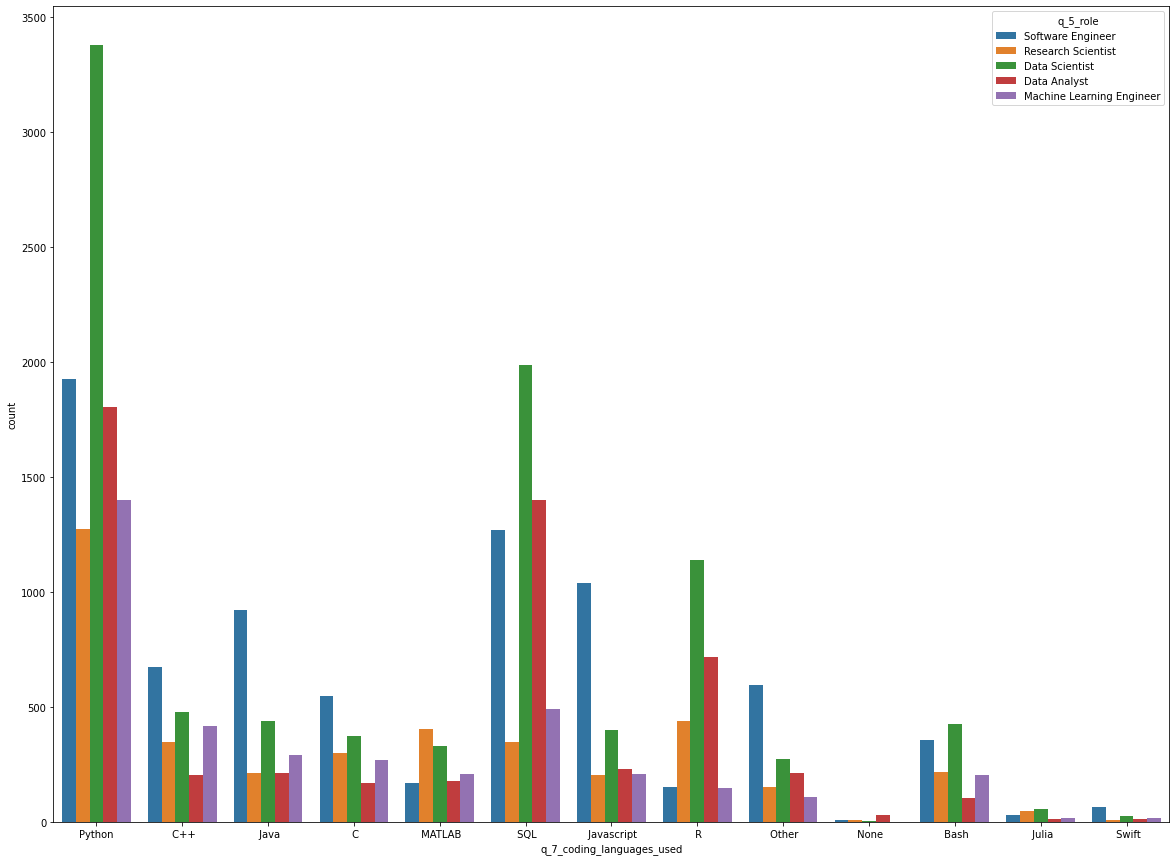

In [30]:
# Vamos a verlo mejor con un gráfico de lenguajes de programación usados por rol profesional
plt.figure(figsize= (20,15))
sns.countplot(x = 'q_7_coding_languages_used', data = df4_1, hue= 'q_5_role');

> * Vemos que los más usados son Python, SQL, Java, Javascript, C++ y R, dependiendo de la profesión

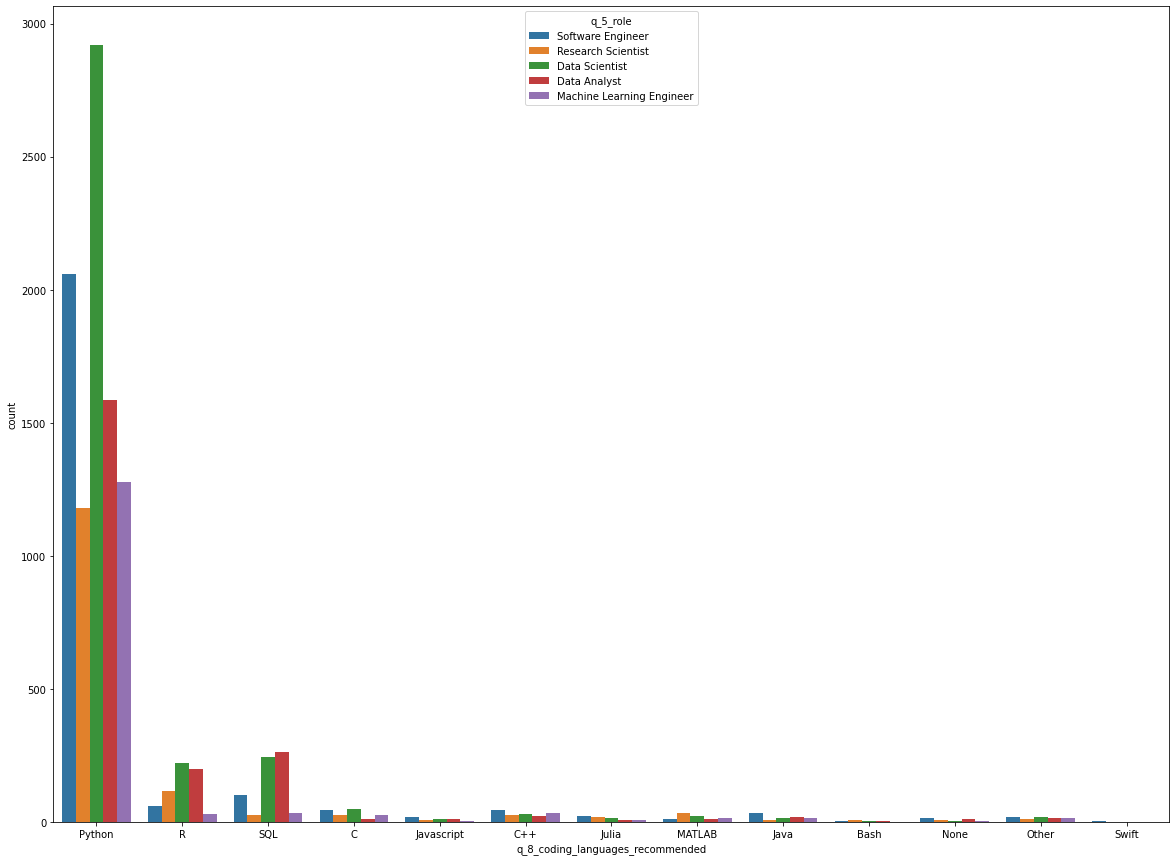

In [31]:
# En este gráfico vemos cuáles lenguajes recomienda cada rol profesional
plt.figure(figsize= (20,15))
sns.countplot(x = 'q_8_coding_languages_recommended', data = df3, hue= 'q_5_role');

> * Python es el más recomendadp por todos los profesionales que tienen experiencia en ML
> * Seguido de SQL y R y C++